# ListenBrainz Music 

## Goals

1. Top 20 artists for 2018
2. Top users for stream tracks in 2018
3. Most popular time of day by tracks streamed in 2018

In [2]:
import pandas as pandas
import matplotlib.pyplot as plt

In [3]:
# Google Bigquery setup
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
'Keys/solid-sun-403912-82c1c7b687e3.json')

project_id = 'solid-sun-403912'
client = bigquery.Client(credentials= credentials,project=project_id)
table = "listenbrainz.listenbrainz.listen"

plt.style.use('Solarize_Light2')

In [41]:
# Testing connection to BigQuery
query_job = client.query("""
    SELECT *
    FROM listenbrainz.listenbrainz.listen
    LIMIT 10
""")

results = query_job.result().to_dataframe() # Wait for the job to complete

results.head()

,listened_at,user_name,artist_msid,artist_name,artist_mbids,release_msid,release_name,release_mbid,recording_msid,track_name,recording_mbid,tags
0,2018-04-29 16:29:19+00:00,munhoz,5c982001-3a31-46c8-8c36-f7248d6539d0,UA,,96f87e80-6a36-435a-80f9-74cd6b375871,Sun,,174d6b6e-2ede-48a5-823b-569d4f3ba69e,そんな空には踊る馬,09456ba9-42be-462e-96a6-b31ca333e2d8,
1,2018-04-29 16:50:39+00:00,munhoz,5c982001-3a31-46c8-8c36-f7248d6539d0,UA,,96f87e80-6a36-435a-80f9-74cd6b375871,Sun,,1e665113-4108-49d2-9e7a-8e8087ca6327,踊る鳥と金の雨,1a31b863-cdcf-4559-a50a-813c7873d027,
2,2018-04-29 16:43:43+00:00,munhoz,5c982001-3a31-46c8-8c36-f7248d6539d0,UA,,96f87e80-6a36-435a-80f9-74cd6b375871,Sun,,1a68d0dd-c3a8-4bf9-a6b4-715424670ddb,ファティマとセミラ,92a20cad-e326-44dd-982f-a1137fc579ed,
3,2018-04-29 16:56:34+00:00,munhoz,5c982001-3a31-46c8-8c36-f7248d6539d0,UA,,96f87e80-6a36-435a-80f9-74cd6b375871,Sun,,0472b5ad-d4ea-45c0-8b4f-a1d00ae111b6,Papito,46e19443-bc65-4aab-8afa-02ca5afe6acc,
4,2018-04-29 17:01:59+00:00,munhoz,5c982001-3a31-46c8-8c36-f7248d6539d0,UA,,96f87e80-6a36-435a-80f9-74cd6b375871,Sun,,4db81a87-588f-426f-85ab-358b6297975f,Lightning,1c73fa1b-84a3-4b9f-bc44-cd65c44834f7,


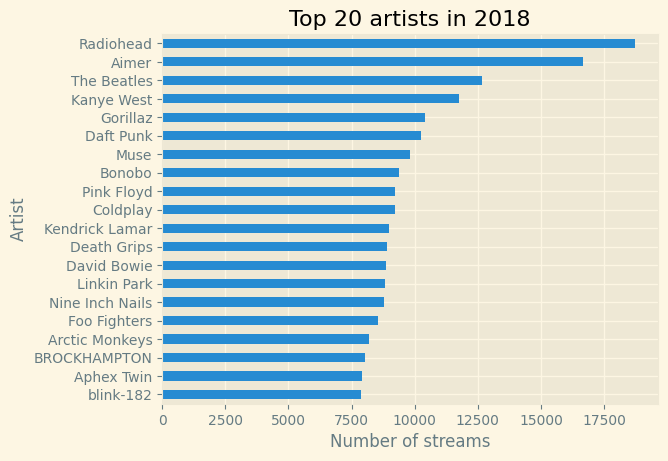

In [42]:
# Query for top 20 artists in 2018
top20_artists_query = client.query("""
    SELECT artist_name, COUNT(artist_name) as num_plays
    FROM listenbrainz.listenbrainz.listen
    WHERE EXTRACT(YEAR FROM listened_at) = 2018
    GROUP BY artist_name
    ORDER BY num_plays DESC
    LIMIT 20;
""")

top20_artists_df = top20_artists_query.result().to_dataframe()

top20_artists_df.plot.barh(x="artist_name", y="num_plays", title="Top 20 artists in 2018", legend=False, xlabel="Number of streams", ylabel="Artist").invert_yaxis()

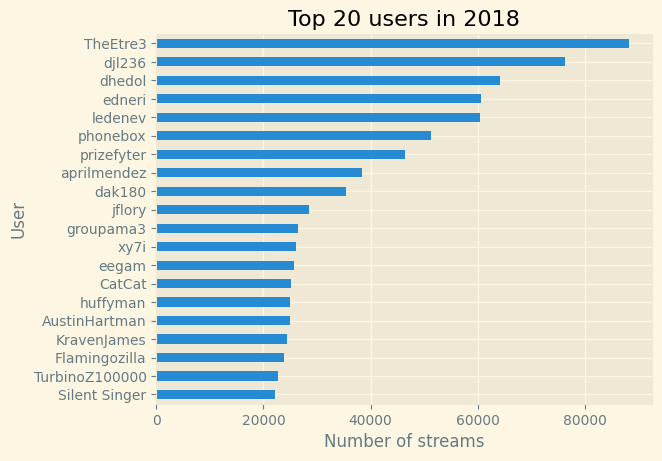

In [43]:
# Query for top 20 users in 2018
top20_users_query = client.query("""
    SELECT user_name, COUNT(user_name) as num_plays
    FROM listenbrainz.listenbrainz.listen
    WHERE EXTRACT(YEAR FROM listened_at) = 2018
    GROUP BY user_name
    ORDER BY num_plays DESC
    LIMIT 20;
""")

top20_users_query = top20_users_query.result().to_dataframe()

top20_users_query.plot.barh(x="user_name", y="num_plays", title="Top 20 users in 2018", legend=False, xlabel="Number of streams", ylabel="User").invert_yaxis()

<Axes: title={'center': 'Streams per hour of day in 2018'}, xlabel='Hour', ylabel='Streams'>

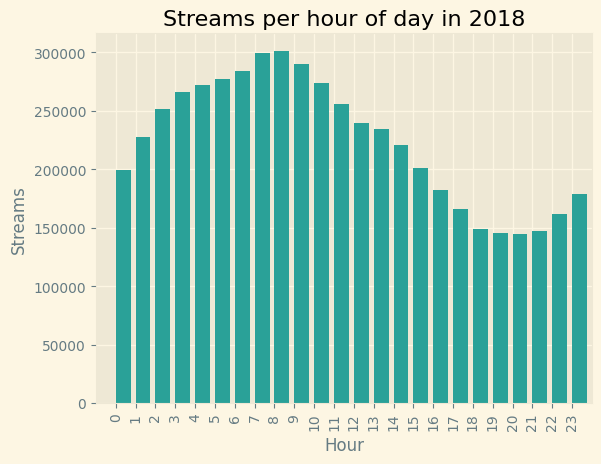

In [46]:
# Query for most popular time of day by tracks streamed
time_of_day_hist_query = client.query("""
    SELECT EXTRACT(HOUR FROM listened_at) as hour, COUNT(listened_at) as streams
    FROM listenbrainz.listenbrainz.listen
    WHERE EXTRACT(YEAR FROM listened_at) = 2018
    GROUP BY hour
    ORDER BY hour DESC
""")

time_of_day_hist_df = time_of_day_hist_query.result().to_dataframe()
time_of_day_hist_df.plot.bar(width=1.5, legend=False, title="Streams per hour of day in 2018", xlabel="Hour", ylabel="Streams")